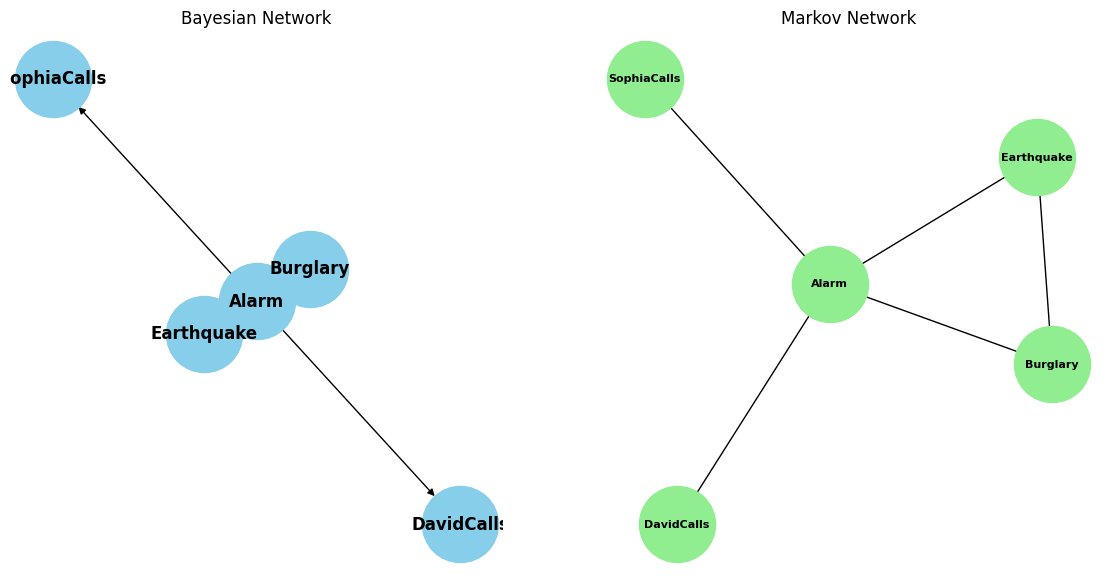

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def moralize_bn_to_mn(dag):
    # Create an undirected graph for the Markov Network
    mn = nx.Graph()
    
    # Add all nodes to the undirected graph
    mn.add_nodes_from(dag.nodes)
    
    # Step 1: Add undirected edges between all parents of each node
    for node in dag.nodes:
        parents = list(dag.predecessors(node))
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                mn.add_edge(parents[i], parents[j])
    
    # Step 2: Add undirected edges corresponding to the directed edges of the DAG
    for edge in dag.edges:
        mn.add_edge(edge[0], edge[1])
    
    return mn

# Create the Bayesian Network (DAG)
bn = nx.DiGraph()
bn.add_edges_from([
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Visualize the Bayesian Network
plt.figure(figsize=(14, 7))
plt.subplot(121)
nx.draw(bn, with_labels=True, node_size=3000, node_color="skyblue", pos=nx.spring_layout(bn), font_size=12, font_weight='bold')
plt.title("Bayesian Network")

# Moralize the Bayesian Network to get a Markov Network
mn = moralize_bn_to_mn(bn)

# Visualize the Markov Network
plt.subplot(122)
nx.draw(mn, with_labels=True, node_size=3000, node_color="lightgreen", pos=nx.spring_layout(mn), font_size=8, font_weight='bold')
plt.title("Markov Network")

plt.show()


Markov to Bayesian

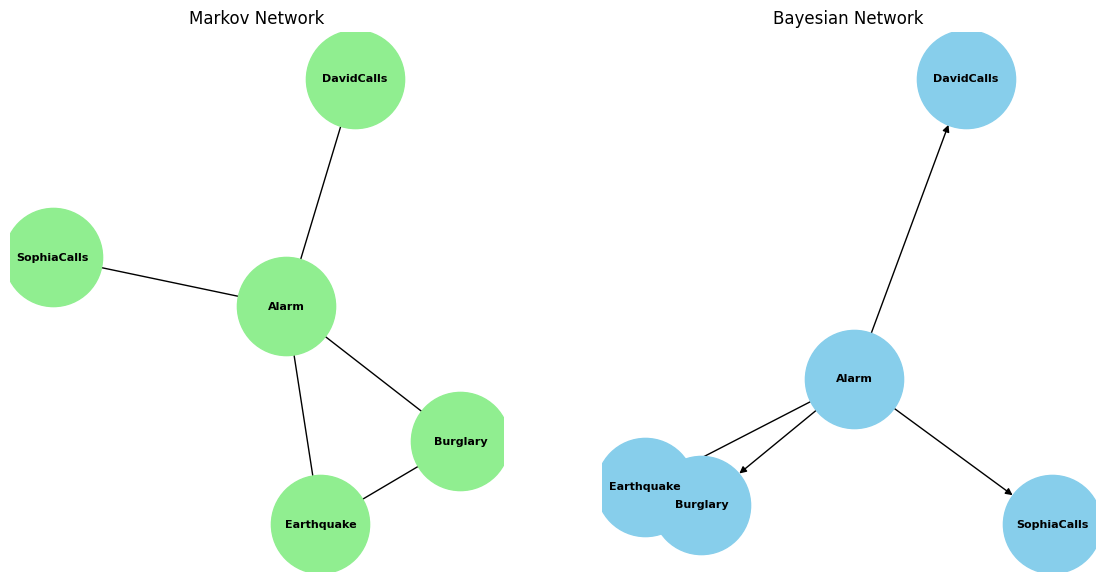

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def markov_to_bayesian(mn):
    bn = nx.DiGraph()
    nodes = list(mn.nodes)
    
    for node in nodes:
        neighbors = list(mn.neighbors(node))
        for neighbor in neighbors:
            if node < neighbor:  # Ensure acyclic graph by adding edges in a consistent order
                bn.add_edge(node, neighbor)
    
    return bn

# Create the Markov Network (Undirected Graph)
mn = nx.Graph()
mn.add_edges_from([
    ('Burglary', 'Earthquake'),
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Visualize the Markov Network
plt.figure(figsize=(14, 7))
plt.subplot(121)
nx.draw(mn, with_labels=True, node_size=5000, node_color="lightgreen", pos=nx.spring_layout(mn), font_size=8, font_weight='bold')
plt.title("Markov Network")

# Convert the Markov Network to a Bayesian Network
bn = markov_to_bayesian(mn)

# Visualize the Bayesian Network
plt.subplot(122)
nx.draw(bn, with_labels=True, node_size=5000, node_color="skyblue", pos=nx.spring_layout(bn), font_size=8, font_weight='bold')
plt.title("Bayesian Network")

plt.show()


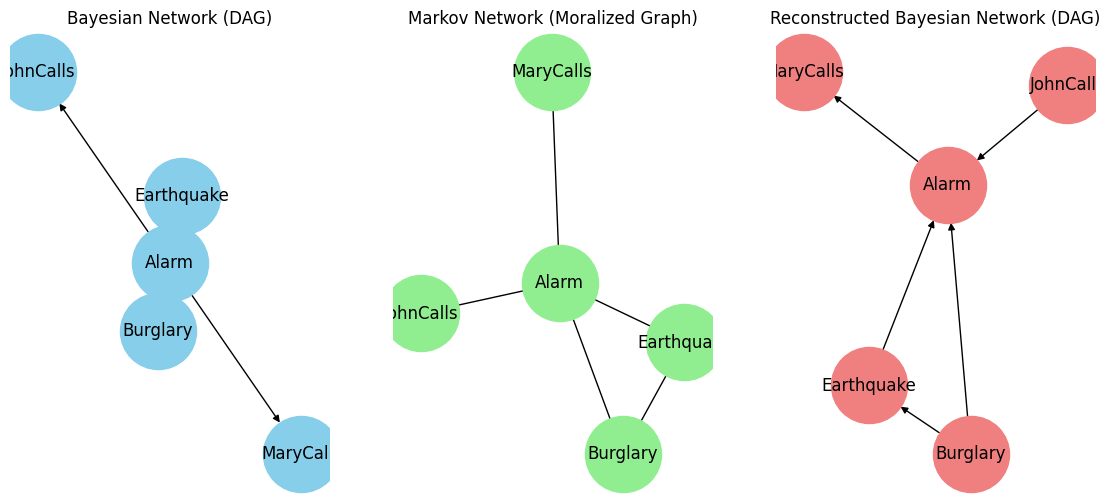

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def moralize_bn_to_mn(dag):
    mn = nx.Graph()
    mn.add_nodes_from(dag.nodes)
    
    for node in dag.nodes:
        parents = list(dag.predecessors(node))
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                mn.add_edge(parents[i], parents[j])
                
    for edge in dag.edges:
        mn.add_edge(edge[0], edge[1])
    
    return mn

def triangulate(graph):
    triangulated_graph = graph.copy()
    while True:
        chordal = True
        for cycle in nx.cycle_basis(triangulated_graph):
            if len(cycle) > 3:
                chordal = False
                for i in range(len(cycle)):
                    for j in range(i + 2, len(cycle) - 1 + (i > 0)):
                        if not triangulated_graph.has_edge(cycle[i], cycle[j]):
                            triangulated_graph.add_edge(cycle[i], cycle[j])
        if chordal:
            break
    return triangulated_graph

def perfect_elimination_ordering(graph):
    ordering = []
    g = graph.copy()
    while g.nodes:
        for node in list(g.nodes):
            neighbors = list(g.neighbors(node))
            if all(g.has_edge(neighbors[i], neighbors[j]) for i in range(len(neighbors)) for j in range(i + 1, len(neighbors))):
                ordering.append(node)
                g.remove_node(node)
                break
    return ordering

def orient_edges(graph, ordering):
    dag = nx.DiGraph()
    dag.add_nodes_from(graph.nodes)
    for i, node in enumerate(ordering):
        for neighbor in graph.neighbors(node):
            if ordering.index(neighbor) > i:
                dag.add_edge(node, neighbor)
    return dag

# Create the Bayesian Network (DAG) for the Alarm-Burglary example
bn = nx.DiGraph()
bn.add_edges_from([
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'JohnCalls'),
    ('Alarm', 'MaryCalls')
])

# Visualize the Bayesian Network
plt.figure(figsize=(14, 6))
plt.subplot(131)
nx.draw(bn, with_labels=True, node_size=3000, node_color="skyblue", pos=nx.spring_layout(bn))
plt.title("Bayesian Network (DAG)")

# Moralize the Bayesian Network to get the Markov Network
mn = moralize_bn_to_mn(bn)

# Visualize the Markov Network (Moralized Graph)
plt.subplot(132)
nx.draw(mn, with_labels=True, node_size=3000, node_color="lightgreen", pos=nx.spring_layout(mn))
plt.title("Markov Network (Moralized Graph)")

# Convert back to Bayesian Network
# Step 1: Triangulate the graph
triangulated_mn = triangulate(mn)

# Step 2: Find a perfect elimination ordering
ordering = perfect_elimination_ordering(triangulated_mn)

# Step 3: Orient the edges based on the ordering to form a DAG
reconstructed_bn = orient_edges(triangulated_mn, ordering)

# Visualize the reconstructed Bayesian Network
plt.subplot(133)
nx.draw(reconstructed_bn, with_labels=True, node_size=3000, node_color="lightcoral", pos=nx.spring_layout(reconstructed_bn))
plt.title("Reconstructed Bayesian Network (DAG)")

plt.show()

# Final code

<span style="color: orange; font-size: 40px;">Bayesian Network (DAG) to Markov Network</span>





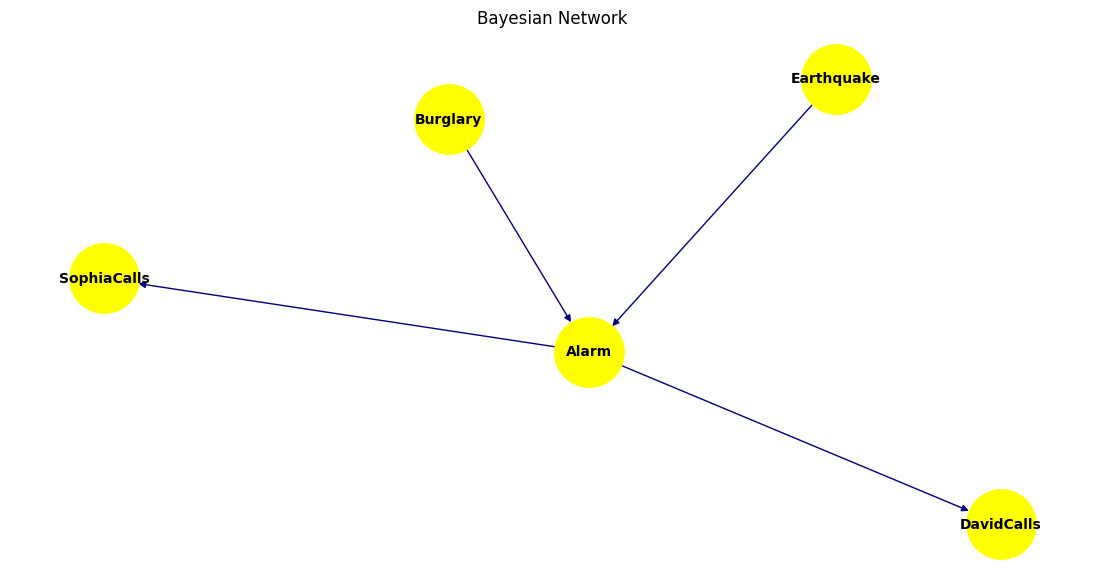

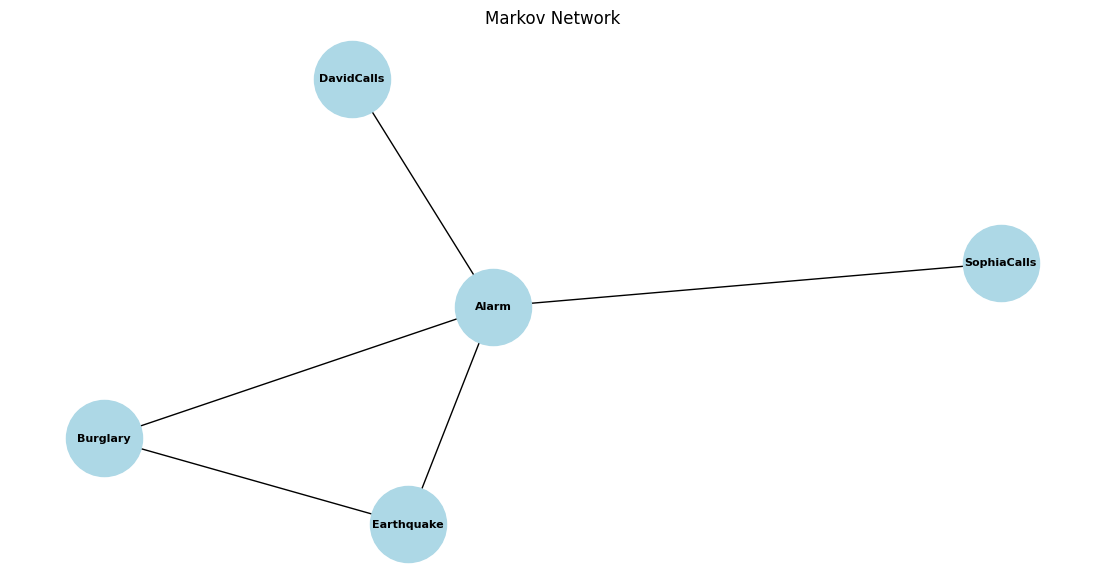

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def moralize_bn_to_mn(dag):
    # Create an undirected graph for the Markov Network
    mn = nx.Graph()
    
    # Add all nodes to the undirected graph
    mn.add_nodes_from(dag.nodes)
    
    # Step 1: Add undirected edges between all parents of each node
    for node in dag.nodes:
        parents = list(dag.predecessors(node))
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                mn.add_edge(parents[i], parents[j])
    
    # Step 2: Add undirected edges corresponding to the directed edges of the DAG
    for edge in dag.edges:
        mn.add_edge(edge[0], edge[1])
    
    return mn

# Create the Bayesian Network (DAG)
bn = nx.DiGraph()
bn.add_edges_from([
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Visualize the Bayesian Network
plt.figure(figsize=(14, 7))
plt.title("Bayesian Network")
nx.draw(bn, with_labels=True, node_size=2500, node_color="yellow", edge_color='navy', pos=nx.spring_layout(bn), font_size=10, font_weight='bold')
plt.show()

# Moralize the Bayesian Network to get a Markov Network
mn = moralize_bn_to_mn(bn)

# Visualize the Markov Network
plt.figure(figsize=(14, 7))
plt.title("Markov Network")
nx.draw(mn, with_labels=True, node_size=3000, node_color="lightblue", edge_color='black', pos=nx.spring_layout(mn), font_size=8, font_weight='bold')
plt.show()


# Final code

<span style="color: orange; font-size: 40px;">Markov Network to Bayesian Network (DAG) </span>





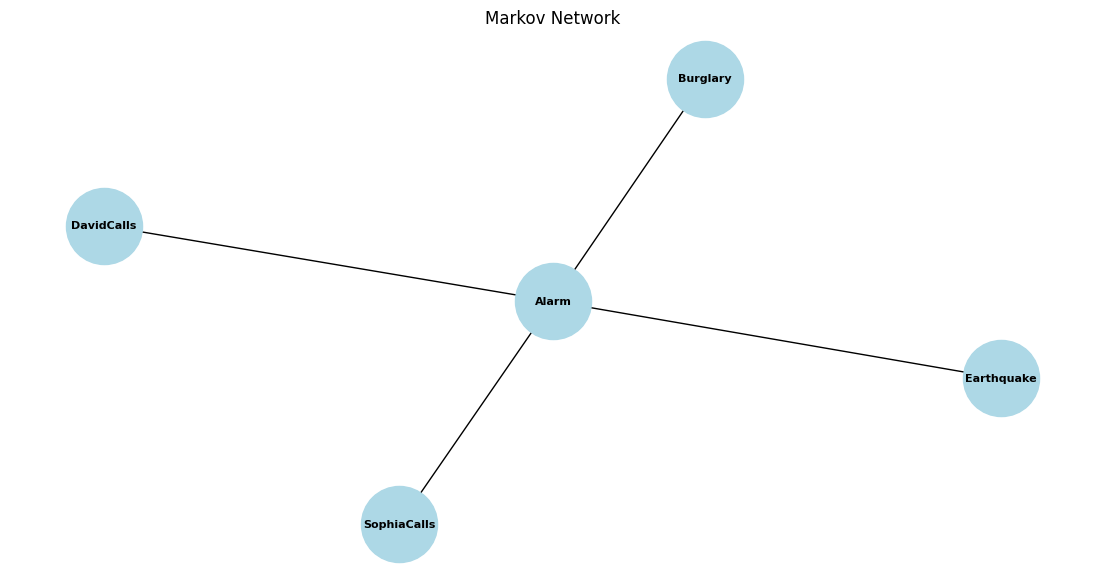

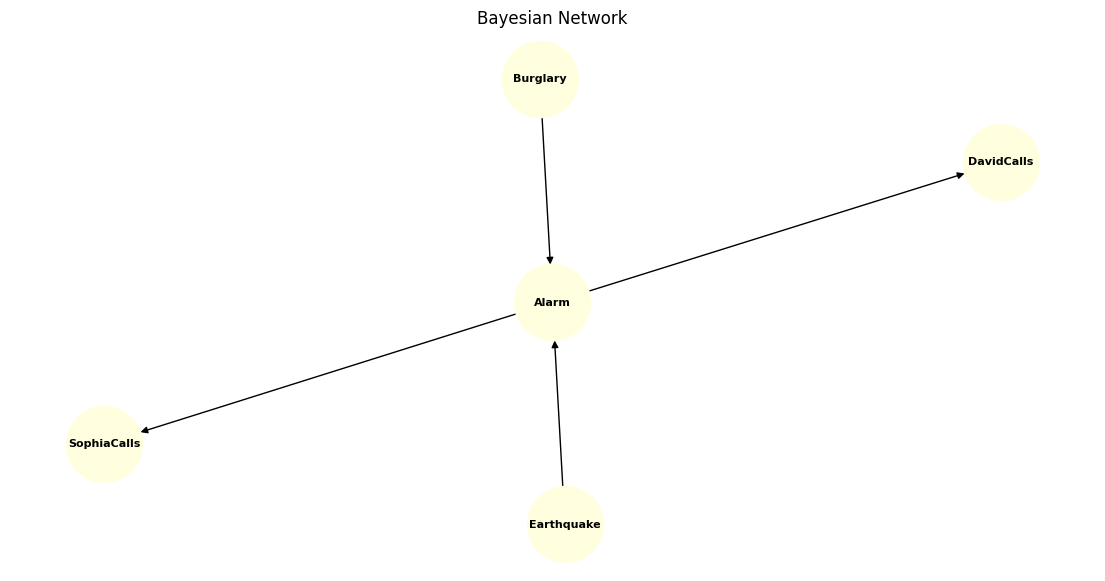

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Markov Network (Undirected Graph)
mn = nx.Graph()
mn.add_edges_from([
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Visualize the Markov Network
plt.figure(figsize=(14, 7))
plt.title("Markov Network")
nx.draw(mn, with_labels=True, node_size=3000, node_color="lightblue", edge_color='black', pos=nx.spring_layout(mn), font_size=8, font_weight='bold')
plt.show()

# Define a possible Bayesian Network corresponding to the Markov Network
def convert_mn_to_bn(mn):
    bn = nx.DiGraph()
    
    # Manually define the directed edges to convert Markov Network to Bayesian Network
    bn.add_edges_from([
        ('Burglary', 'Alarm'),
        ('Earthquake', 'Alarm'),
        ('Alarm', 'DavidCalls'),
        ('Alarm', 'SophiaCalls')
    ])
    
    return bn

# Convert the Markov Network to a Bayesian Network
bn = convert_mn_to_bn(mn)

# Visualize the Bayesian Network
plt.figure(figsize=(14, 7))
plt.title("Bayesian Network")
nx.draw(bn, with_labels=True, node_size=3000, node_color="lightyellow", edge_color='black', pos=nx.spring_layout(bn), font_size=8, font_weight='bold')
plt.show()
